# Journal Names

Questions in the context of fuzzy matching.

* How many journal names appear more than once?
* What is the average length of the duplicated names vs the unique names?


Input file is a single larger JSON, mapping names to issns.
```json
{
  "Acta Orientalia.": [
    "0001-6438"
  ],
  "Acta Orientalia (København)": [
    "0001-6438"
  ],
..
```

In [1]:
import json
import pandas as pd

In [2]:
with open("../data/name_to_issn.json") as f:
    mapping = json.load(f)

We have about 3M keys.

In [3]:
len(mapping)

2929727

In [4]:
df = pd.DataFrame(((k, len(v)) for k, v in mapping.items()), columns=["name", "issn_count"])

In [5]:
len(df)

2929727

In [6]:
df.head()

name  issn_count
0             Acta Orientalia.           1
1  Acta Orientalia (København)           1
2     The publishers weekly.           1
3            Publishers weekly           1
4                    ASMT news           1

In [7]:
unique_name = df[df.issn_count == 1]

In [8]:
repeated_names = df[df.issn_count > 1]

In [9]:
len(repeated_names)

194241

In [10]:
len(repeated_names) / len(df)

0.06630003409874026

About 6% (or 194241) names are repeated. 

In [11]:
repeated_names.describe()

issn_count
count  194241.000000
mean        3.197523
std        25.081605
min         2.000000
25%         2.000000
50%         2.000000
75%         2.000000
max      8980.000000

Which name is shared by over 8000 ISSN?

In [12]:
repeated_names.iloc[repeated_names.issn_count.argmax()] # Annual report.

name          Annual report.
issn_count              8980
Name: 45907, dtype: object

It is the "Annual report."

In [13]:
mapping["Annual report."][:10]

['0706-537X',
 '1186-7957',
 '2324-1926',
 '1445-9248',
 '0872-3982',
 '1714-1524',
 '1037-8812',
 '0225-0241',
 '1327-6344',
 '0702-7702']

On average a repeated name will point to 3 ISSN. About 24k names point to more than 3 ISSN.

In [14]:
len(repeated_names[repeated_names.issn_count > 3])

24107

In [15]:
repeated_names[repeated_names.issn_count > 3].sample(n=10)

name  issn_count
395908                Criminal trial manual.           4
336247                              Mesures.           4
2242923                     Tinere speranţe.           4
380962                          Résistances.           5
823415                          Le Paysan.          14
157897   Barron's regents exams and answers.          18
468031                   Revista científica.          14
1102294                     Kotoba to bunka.           4
2049420                        L'Harmonie.           7
10843                                Design.          14

In [16]:
mapping["Philosophica."]

['1285-9133',
 '1480-4670',
 '1487-5349',
 '1724-6598',
 '2183-0134',
 '2538-693X',
 '2610-8933',
 '2035-8326',
 '2295-9084',
 '1517-8889',
 '2249-5053',
 '2420-9198',
 '2654-9263',
 '2610-8925',
 '1158-9574',
 '0872-4784',
 '0379-8402']

<AxesSubplot:>

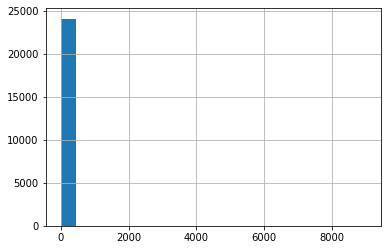

In [17]:
repeated_names[repeated_names.issn_count > 3].issn_count.hist(bins=20)

<AxesSubplot:>

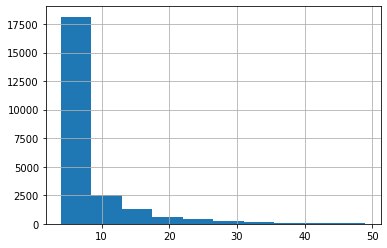

In [18]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 50)].issn_count.hist(bins=10)

<AxesSubplot:>

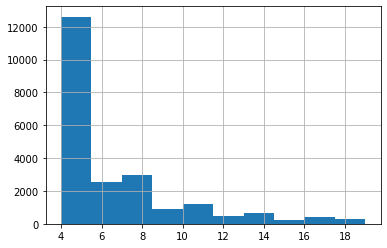

In [19]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 20)].issn_count.hist(bins=10)

<AxesSubplot:>

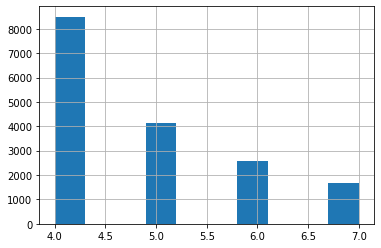

In [20]:
repeated_names[(repeated_names.issn_count > 3) & (repeated_names.issn_count < 8)].issn_count.hist()

<AxesSubplot:>

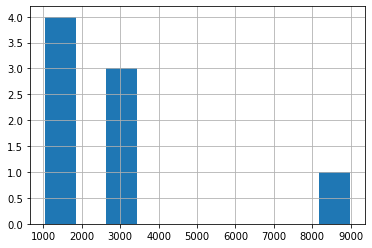

In [21]:
repeated_names[repeated_names.issn_count > 1000].issn_count.hist(bins=10)

In [22]:
repeated_names[repeated_names.issn_count > 1000]

name  issn_count
3499         Bulletin.        2752
7632       Newsletter.        2715
8317          Rapport.        1050
23662     Proceedings.        1403
45839  Annual report /        1090
45907   Annual report.        8980
45964        Annuaire.        1260
47217  Rapport annuel.        2656

In [23]:
repeated_names[repeated_names.issn_count > 500]

name  issn_count
102        Bulletin d'information.         693
3218          Bulletin de liaison.         510
3499                     Bulletin.        2752
7632                   Newsletter.        2715
8317                      Rapport.        1050
23662                 Proceedings.        1403
45794                      Report.         743
45839              Annual report /        1090
45907               Annual report.        8980
45964                    Annuaire.        1260
46370                 Jaarverslag.         675
47142          Rapport d'activité.         660
47217              Rapport annuel.        2656
49289               Jahresbericht.         518
57558                Annual report         760
121599          Alumni directory /         511
128827         Bulletin municipal.         521
150529                La Lettre.         623
168933  Local climatological data.         613
269004                  Estimates.         535

In [24]:
repeated_names[repeated_names.issn_count > 200]

name  issn_count
102          Bulletin d'information.         693
2665                    Newsletter /         259
3218            Bulletin de liaison.         510
3499                       Bulletin.        2752
3926                        Boletín.         216
...                              ...         ...
425644        Rapport d'activité ...         394
532500           Relatório e contas.         247
603144   Bildung und Beruf regional.         292
1006131             Vies de famille.         222
1110247        Country risk service.         271

[66 rows x 2 columns]

In [25]:
repeated_names[repeated_names.issn_count > 100]

name  issn_count
102         Bulletin d'information.         693
2665                   Newsletter /         259
3218           Bulletin de liaison.         510
3499                      Bulletin.        2752
3926                       Boletín.         216
...                             ...         ...
1306798           Country commerce.         120
1318569     Bible studies for life.         159
1796742  LexisNexis practice guide.         101
2628387    Operational risk report.         119
2650557          Interempresas net.         108

[191 rows x 2 columns]

In [26]:
repeated_names

name  issn_count
5                              Activitas Nervosa Superior.           2
11                                        Library journal.           2
23                                      Acta cardiologica.           2
26                                   Actualidad económica.           3
31                                     Acta Ornithologica.           3
...                                                    ...         ...
2929626                        Modern machine shop México.           2
2929635  Lecture notes in control and information scien...           2
2929646  Critical Studies in Dance Leadership and Inclu...           2
2929691            Nigerian Journal of Wildlife Management           2
2929702  Verzeichniss der Kunstwerke lebender Künstler,...           2

[194241 rows x 2 columns]

If a name matches a repeated name exactly or fuzzy matches to a repeated name and there is not other information available, the match status must be ambigious.

In [28]:
mapping["Nigerian Journal of Wildlife Management"]

['2735-928X', '2735-9298']

These are two ISSN refering to the same journal.

In [29]:
import requests

In [30]:
requests.get("https://portal.issn.org/resource/ISSN/2735-928X?format=json").json()

{'@graph': [{'@id': 'http://id.loc.gov/vocabulary/countries/nr',
   'label': 'Nigeria'},
  {'@id': 'organization/ISSNCenter#_e',
   '@type': 'http://schema.org/Organization'},
  {'@id': 'resource/ISSN-L/2735-9298',
   'identifiedBy': 'resource/ISSN/2735-928X#ISSN-L'},
  {'@id': 'resource/ISSN/2735-928X',
   '@type': ['http://id.loc.gov/ontologies/bibframe/Work',
    'http://id.loc.gov/ontologies/bibframe/Instance',
    'http://schema.org/Periodical'],
   'identifiedBy': ['resource/ISSN/2735-928X#ISSN-L',
    'resource/ISSN/2735-928X#ISSN',
    'resource/ISSN/2735-928X#KeyTitle'],
   'mainTitle': 'Nigerian Journal of Wildlife Management',
   'otherPhysicalFormat': 'resource/ISSN/2735-9298',
   'title': 'resource/ISSN/2735-928X#KeyTitle',
   'format': 'vocabularies/medium#Online',
   'identifier': '2735-928X',
   'isFormatOf': 'resource/ISSN/2735-9298',
   'type': 'http://marc21rdf.info/terms/formofmaterial#a',
   'http://purl.org/ontology/bibo/issn': '2735-928X',
   'isPartOf': 'resourc

Interestingly, most (93%) journal do not seem to have the distinction between electronic and print. 

In [32]:
len(unique_name) / len(df)

0.9336999659012597

In [35]:
unique_name.sample(n=10)

name  issn_count
702322     International accounting and auditing standards           1
39992                          Varaždinske vijesti (Tisak)           1
1722785                Nihon Shuwa Gakkai Taikai yokoushuu           1
2598901                                  Solidarité laïque           1
2408544                                               AUP!           1
1785394        The ASHRAE handbook CD. HVAC applications           1
325078                                        Kampō iyaku           1
49595                              Fieldiana. Anthropology           1
110831   Vyčislitelʹnaâ matematika i matematičeskaâ fiz...           1
2880661             The Assembly Reporters Africa ( Abuja)           1

## Example "Fieldiana"

* "Fieldiana. Anthropology"
* https://www.jstor.org/journal/fieldianaanthro

In [36]:
mapping["Fieldiana. Anthropology"]

['0071-4739']

However, jstor reports two ISSN: INSSP: 0071-4739, EISSN: 2162-4321 - but ISSN.org does not know about it?

In [47]:
unique_issn = set([item for v in mapping.values() for item in v])

In [48]:
"2162-4321" in unique_issn

True

In [51]:
for k, v in mapping.items():
    if "2162-4321" in v:
        print(k, v)

Fieldiana. ['2163-7105', '2162-4321', '0096-0438', '0015-0746', '0096-2651', '0097-3572', '2162-4267', '0015-0754', '0071-4739', '2162-4348', '2162-4291', '2158-5520']
Fieldiana. Anthropology (Online) ['2162-4321']


As an example: when given a string like "Fieldiana" we would return ambiguous. But "Fieldiana. (Online)" might be matched to '2162-4321'. 

## Other Examples

In [53]:
repeated_names.sample(n=10)

name  issn_count
2190239                                  Mediazine.           4
396642   San Bernardino County popular street atlas           3
510019                                L'esquisse.           2
1517119                   Developing mental health.           2
1853045                                     Jan Dix           2
1021374                            Rennes 1 campus.           2
746313   Russian journal of coordination chemistry.           2
1087451                                    Pomorac.           2
109465                           Bloknot agitatora.          36
1154969                                   Estonia :           2

In [54]:
mapping["Russian journal of coordination chemistry."]

['1608-3318', '1070-3284']

A new question: How many journals are listed under different names, yet still refer to the same journal?

In [57]:
mapping["San Bernardino County popular street atlas"]

['0733-7167', '0733-7159', '0733-2289']

## Journal of ...

In [61]:
df[df.name.str.startswith("Journal of")]

name  issn_count
977                        Journal of vocational behavior.           1
978                 Journal of vocational behavior (Print)           1
1206               Journal of American Concrete Institute.           1
1207            Journal of the American Concrete Institute           1
1310     Journal of the American Dental Hygienists' Ass...           1
...                                                    ...         ...
2929340    Journal of surgical procedures and case reports           1
2929448  Journal of Epidermiological Society of Nigeria...           1
2929449     Journal of Epidermiological Society of Nigeria           1
2929663                     Journal of Practicing Teachers           1
2929664       Journal of Practicing Teachers (Uyo. Online)           1

[40190 rows x 2 columns]